In [1]:
%reset
from netCDF4 import Dataset
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import xarray as xr
from xgcm import Grid
import numpy as np
import cmocean
import warnings
warnings.filterwarnings("ignore")

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [2]:
#%cd /glade/scratch/eyankovsky/Backscatter_tests_with_Scott/Half_degree/Bachman_EBT_test4/

%cd /glade/scratch/eyankovsky/Backscatter_tests_with_Scott/Half_degree/Jansen_EBT_test2/

av = xr.open_dataset('averages_00030002.nc', decode_times=False)  
MEKEds = xr.open_dataset('MEKEaverages_00031502.nc', decode_times=False)


fs = xr.open_dataset('static.nc', decode_times=False)

/glade/scratch/eyankovsky/Backscatter_tests_with_Scott/Half_degree/Jansen_EBT_test2


In [3]:
#Read in various grid variables from the static file:

depth = np.array(fs['depth_ocean'])
area_t=np.array(fs['area_t'])

xh = fs.xh.values
yh = fs.yh.values


MEKE_src_adv      = MEKEds['MEKE_src_adv'].mean('time')
MEKE_src_mom_K4   = MEKEds['MEKE_src_mom_K4'].mean('time')
MEKE_src_btm_drag = MEKEds['MEKE_src_btm_drag'].mean('time')
MEKE_src_GM       = MEKEds['MEKE_src_GM'].mean('time')
MEKE_src_mom_lp   = MEKEds['MEKE_src_mom_lp'].mean('time')
MEKE_src_mom_bh   = MEKEds['MEKE_src_mom_bh'].mean('time')

MEKE = MEKEds['MEKE'].mean('time')
Sum = MEKE_src_adv + MEKE_src_mom_K4 + MEKE_src_btm_drag + MEKE_src_GM + MEKE_src_mom_lp + MEKE_src_mom_bh

print(Sum.shape)

np.nanmean(MEKE_src_mom_lp)

(280, 120)


-1.0985548e-08

In [4]:
import matplotlib.colors as colors

class MidpointNormalize(colors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

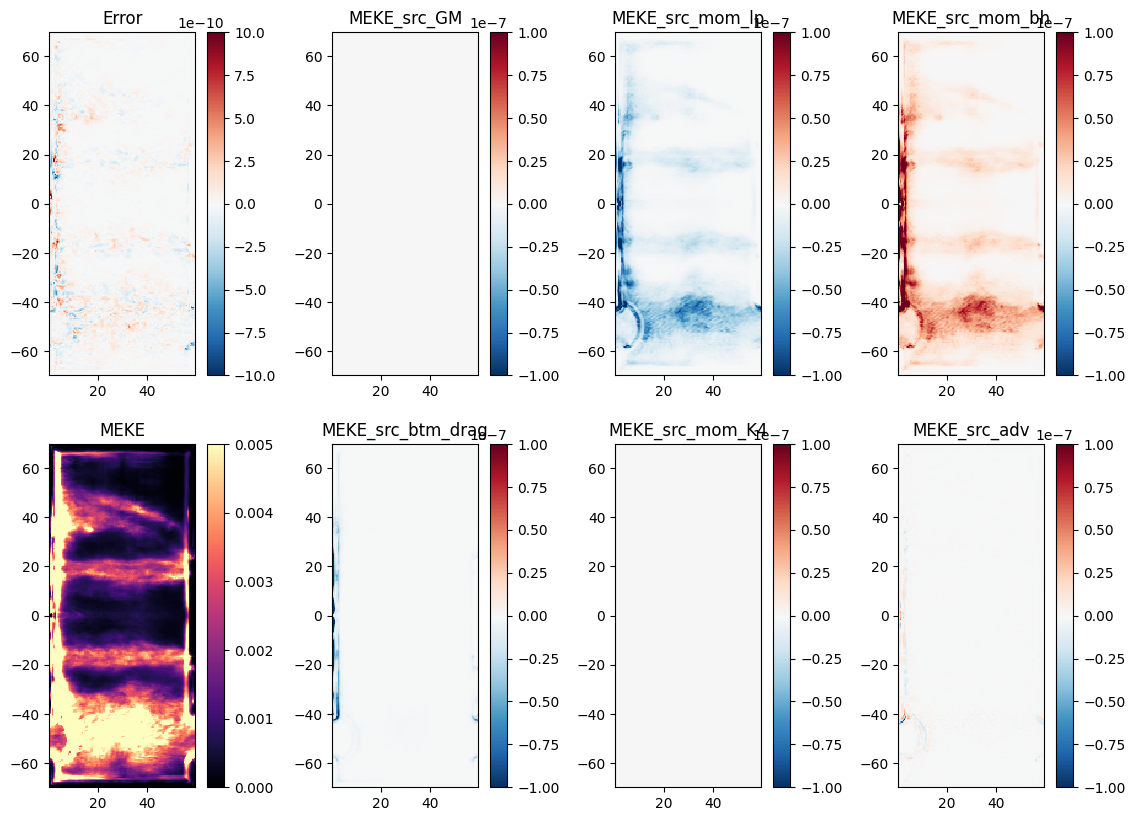

In [5]:
plt.figure(figsize=(14,10),dpi=100)


cmin=-1e-7; cmax=1e-7;


plt.subplot(2,4,1)
plt.pcolormesh(xh,yh,Sum,cmap='RdBu_r',vmin=cmin/100,vmax=cmax/100)
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Error')
cbar=plt.colorbar()

plt.subplot(2,4,2)
plt.pcolormesh(xh,yh,MEKE_src_GM,cmap='RdBu_r',vmin=cmin,vmax=cmax)
plt.gca().set_aspect('equal', adjustable='box')
plt.title('MEKE_src_GM')
cbar=plt.colorbar()

plt.subplot(2,4,3)
plt.pcolormesh(xh,yh,MEKE_src_mom_lp,cmap='RdBu_r',vmin=cmin,vmax=cmax)
plt.gca().set_aspect('equal', adjustable='box')
plt.title('MEKE_src_mom_lp')
cbar=plt.colorbar()

plt.subplot(2,4,4)
plt.pcolormesh(xh,yh,MEKE_src_mom_bh,cmap='RdBu_r',vmin=cmin,vmax=cmax)
plt.gca().set_aspect('equal', adjustable='box')
plt.title('MEKE_src_mom_bh')
cbar=plt.colorbar()


plt.subplot(2,4,5)
plt.pcolormesh(xh,yh,MEKE,cmap='magma',vmin=0,vmax=0.005)
plt.gca().set_aspect('equal', adjustable='box')
plt.title('MEKE')
cbar=plt.colorbar()

plt.subplot(2,4,6)
plt.pcolormesh(xh,yh,MEKE_src_btm_drag,cmap='RdBu_r',vmin=cmin,vmax=cmax)
plt.gca().set_aspect('equal', adjustable='box')
plt.title('MEKE_src_btm_drag')
cbar=plt.colorbar()
plt.subplot(2,4,7)

plt.pcolormesh(xh,yh,MEKE_src_mom_K4,cmap='RdBu_r',vmin=cmin,vmax=cmax)
plt.gca().set_aspect('equal', adjustable='box')
plt.title('MEKE_src_mom_K4')
cbar=plt.colorbar()

plt.subplot(2,4,8)
plt.pcolormesh(xh,yh,MEKE_src_adv,cmap='RdBu_r',vmin=cmin,vmax=cmax)
plt.gca().set_aspect('equal', adjustable='box')
plt.title('MEKE_src_adv')
cbar=plt.colorbar()


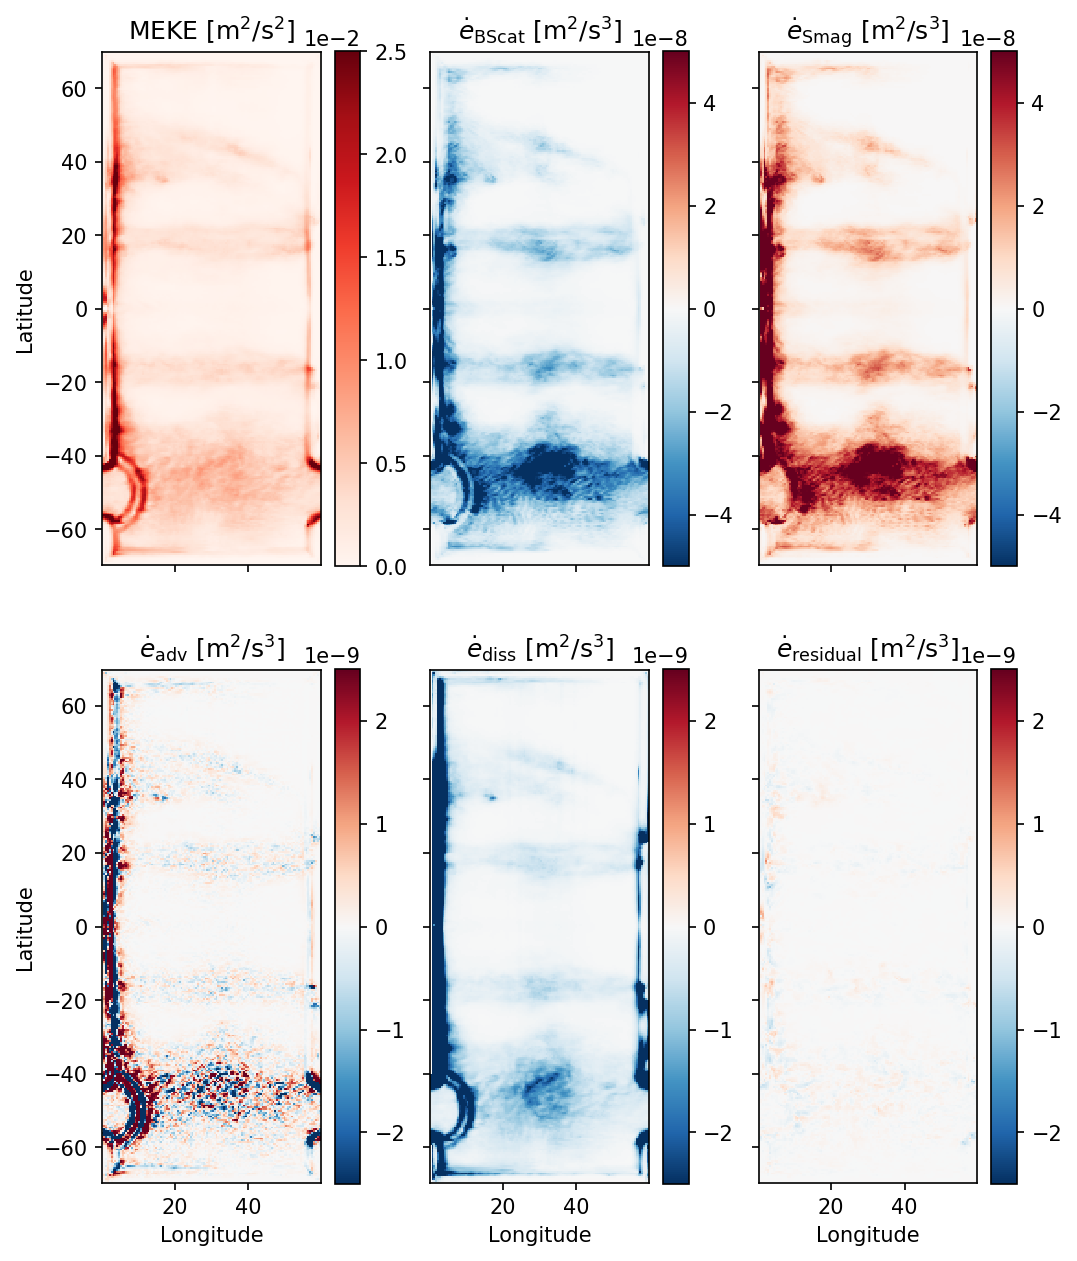

In [21]:

fig, ax = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True, figsize=(8, 10),dpi=150)

cmin=-5e-8; cmax=5e-8;

ax[0,0]=plt.subplot(2,3,1)
plt.pcolormesh(xh,yh,MEKE,cmap='Reds',vmin=0,vmax=0.025)
plt.gca().set_aspect('equal', adjustable='box')
plt.title('MEKE [m$^2$/s$^2$]')
plt.ylabel('Latitude')
#plt.set.yticklabels([])
cbar=plt.colorbar()
cbar.formatter.set_powerlimits((0, 0))


# plt.subplot(2,3,2)
# plt.pcolormesh(xh,yh,MEKE_src_GM,cmap='RdBu_r',vmin=cmin,vmax=cmax)
# plt.gca().set_aspect('equal', adjustable='box')
# plt.title('MEKE_src_GM')
# cbar=plt.colorbar()

ax[0,1]=plt.subplot(2,3,2)
plt.pcolormesh(xh,yh,MEKE_src_mom_lp,cmap='RdBu_r',vmin=cmin,vmax=cmax)
plt.gca().set_aspect('equal', adjustable='box')
plt.title(r'$\.e_{\rm BScat}$ [m$^2$/s$^3$]')
cbar=plt.colorbar()

ax[0,2]=plt.subplot(2,3,3)
plt.pcolormesh(xh,yh,MEKE_src_mom_bh,cmap='RdBu_r',vmin=cmin,vmax=cmax)
plt.gca().set_aspect('equal', adjustable='box')
plt.title(r'$\.e_{\rm Smag}$ [m$^2$/s$^3$]')

cbar=plt.colorbar()
ax[1,0]=plt.subplot(2,3,4)
plt.pcolormesh(xh,yh,MEKE_src_adv,cmap='RdBu_r',vmin=cmin/20,vmax=cmax/20)
plt.gca().set_aspect('equal', adjustable='box')
plt.title(r'$\.e_{\rm adv}$ [m$^2$/s$^3$]')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

cbar=plt.colorbar()

ax[1,1]=plt.subplot(2,3,5)
plt.pcolormesh(xh,yh,MEKE_src_btm_drag,cmap='RdBu_r',vmin=cmin/20,vmax=cmax/20)
plt.gca().set_aspect('equal', adjustable='box')
plt.title(r'$\.e_{\rm diss}$ [m$^2$/s$^3$]')
plt.xlabel('Longitude')

cbar=plt.colorbar()



ax[1,2]=plt.subplot(2,3,6)
plt.pcolormesh(xh,yh,Sum,cmap='RdBu_r',vmin=cmin/20,vmax=cmax/20)
plt.gca().set_aspect('equal', adjustable='box')
plt.title(r'$\.e_{\rm residual}$ [m$^2$/s$^3$]')
cbar=plt.colorbar()
plt.xlabel('Longitude')

ax[0,0].tick_params(labelbottom=False)
ax[0,1].tick_params(labelbottom=False)
ax[0,2].tick_params(labelbottom=False)
ax[0,1].tick_params(labelleft=False)
ax[0,2].tick_params(labelleft=False)
ax[1,1].tick_params(labelleft=False)
ax[1,2].tick_params(labelleft=False)

In [10]:
MEKEds

<xarray.Dataset>
Dimensions:            (nv: 2, time: 100, xh: 120, xq: 121, yh: 280, yq: 281)
Coordinates:
  * xh                 (xh) float64 0.25 0.75 1.25 1.75 ... 58.75 59.25 59.75
  * yh                 (yh) float64 -69.75 -69.25 -68.75 ... 68.75 69.25 69.75
  * time               (time) float64 3.15e+04 3.151e+04 ... 3.199e+04 3.2e+04
  * nv                 (nv) float64 1.0 2.0
  * xq                 (xq) float64 0.0 0.5 1.0 1.5 2.0 ... 58.5 59.0 59.5 60.0
  * yq                 (yq) float64 -70.0 -69.5 -69.0 -68.5 ... 69.0 69.5 70.0
Data variables:
    MEKE               (time, yh, xh) float32 nan nan nan nan ... nan nan nan
    MEKE_KH            (time, yh, xh) float32 ...
    MEKE_KU            (time, yh, xh) float32 ...
    MEKE_AU            (time, yh, xh) float32 ...
    MEKE_Ue            (time, yh, xh) float32 ...
    MEKE_Ub            (time, yh, xh) float32 ...
    MEKE_Ut            (time, yh, xh) float32 ...
    MEKE_src           (time, yh, xh) float32 ...
    MEKE_decay         (time, yh, xh) float32 ...
    MEKE_GM_src        (time, yh, xh) float32 ...
    MEKE_mom_src       (time, yh, xh) float32 ...
    MEKE_GME_snk       (time, yh, xh) float32 ...
    MEKE_Le            (time, yh, xh) float32 ...
    MEKE_Lrhines       (time, yh, xh) float32 ...
    MEKE_Leady         (time, yh, xh) float32 ...
    MEKE_gamma_b       (time, yh, xh) float32 ...
    MEKE_gamma_t       (time, yh, xh) float32 ...
    KHMEKE_u           (time, yh, xq) float32 ...
    KHMEKE_v           (time, yq, xh) float32 ...
    MEKE_src_adv       (time, yh, xh) float32 nan nan nan nan ... nan nan nan
    MEKE_src_mom_K4    (time, yh, xh) float32 nan nan nan nan ... nan nan nan
    MEKE_src_btm_drag  (time, yh, xh) float32 nan nan nan nan ... nan nan nan
    MEKE_src_GM        (time, yh, xh) float32 nan nan nan nan ... nan nan nan
    MEKE_src_mom_lp    (time, yh, xh) float32 nan nan nan nan ... nan nan nan
    MEKE_src_mom_bh    (time, yh, xh) float32 nan nan nan nan ... nan nan nan
    average_T1         (time) float64 3.15e+04 3.150e+04 ... 3.199e+04 3.2e+04
    average_T2         (time) float64 3.150e+04 3.151e+04 ... 3.2e+04 3.2e+04
    average_DT         (time) float64 5.0 5.0 5.0 5.0 5.0 ... 5.0 5.0 5.0 5.0
    time_bnds          (time, nv) float64 3.15e+04 3.150e+04 ... 3.2e+04 3.2e+04
Attributes:
    filename:          MEKEaverages_00031502.nc
    title:             NeverWorld2
    associated_files:  area_t: static.nc
    grid_type:         regular
    grid_tile:         N/A